In [1]:
import zetta_utils
from zetta_utils.geometry.bbox import BBox3D
from zetta_utils.geometry.vec import Vec3D
from zetta_utils.layer.volumetric.cloudvol.build import build_cv_layer
import numpy as np
import fastremap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ipywidgets as widgets

/home/joe/miniconda3/envs/full/lib/python3.11/site-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [2]:
data_res = Vec3D(24, 24, 45)
index_res = Vec3D(12, 12, 45)
seg_path = "gs://zheng_mouse_hippocampus_scratch_30/make_cv_happy/seg/v0.1-16nm-updown_24-24-45_20240520021649"
seg_layer = build_cv_layer(seg_path, default_desired_resolution=data_res, allow_slice_rounding=True)


Using default Google credentials. There is no ~/.cloudvolume/secrets/google-secret.json set.

        google-cloud-python might not find your credentials. Your credentials
        might be located in $HOME/.config/gcloud/legacy_credentials/$YOUR_GMAIL/adc.json

        If they are you can export your credentials like so:
        export GOOGLE_APPLICATION_CREDENTIALS="$HOME/.config/gcloud/legacy_credentials/$YOUR_GMAIL/adc.json"
      


In [3]:
start_coord = Vec3D(74100, 86100, 1261 - 4)

end_coord = start_coord + Vec3D(1024, 1024, 16)

data_bbox = BBox3D.from_coords(start_coord, end_coord, resolution=index_res)
seg_data_raw = seg_layer[data_bbox][0]  # select channel 0

In [4]:
seg_data_raw.shape

(512, 512, 16)

In [5]:
# remap the IDs to make them easier to work with (particularly for use with colormap)
seg_data, remapping = fastremap.renumber(seg_data_raw, in_place=True) 
max_value = int(np.max(seg_data_raw))
print(max_value)

918


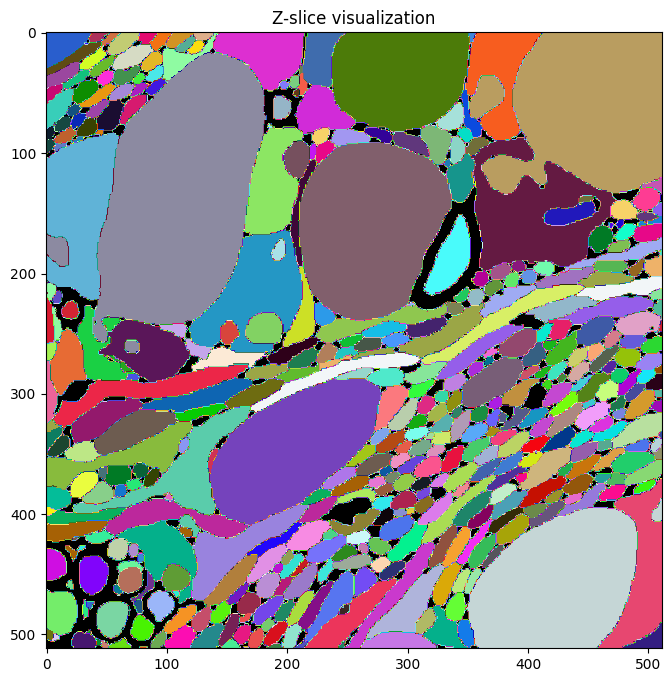

In [6]:
# visualize one Z-slice
z = 0
z_slice = seg_data[:, :, z]

# Create a random colormap
random_rgb = [[0,0,0]] + np.random.rand(max_value-1, 3)  # Generate random RGB colors
random_rgb[0] = [0,0,0]
cmap = mcolors.ListedColormap(random_rgb)

# Plot the Z-slice
plt.figure(figsize=(8, 8))
plt.imshow(z_slice, cmap=cmap)
#plt.colorbar()
plt.title('Z-slice visualization')
plt.show()

In [8]:
# Let's get fancier: a plot with a slider that lets you scrub through Z!
from IPython.display import display, clear_output
def update_plot(z_index):
    z_slice = seg_data[:, :, z_index]
    global output
    with output:
        #clear_output(wait=True)
        plt.figure(figsize=(8, 8))
        plt.imshow(z_slice, cmap=cmap)
        plt.title(f'Z = {z_index}')
        plt.show()

# Create an interactive slider
z_slider = widgets.IntSlider(min=0, max=seg_data.shape[2] - 1, step=1, value=0, description='Z-slice:')
output = widgets.interactive_output(update_plot, {'z_index': z_slider})

# Display the slider and the plot output
display(output, z_slider)
update_plot(0)


Output()

IntSlider(value=0, description='Z-slice:', max=15)